In [3]:
import pandas as pd
import requests
from io import BytesIO

url = "https://github.com/bopo80776288/marketing-campaign-ai-dashboard/raw/main/data/campaign_data_cleaned.xlsx"

response = requests.get(url)
response.raise_for_status()  # 確認檔案下載成功

df = pd.read_excel(BytesIO(response.content), engine='openpyxl')

print(df.head())


        date   channel  impressions  clicks  conversions  revenue region  \
0 2024-06-01     Email         1200     300           50      500  North   
1 2024-06-01  Facebook         3000     200           40      420   East   
2 2024-06-01    Google         5000     500          100     1100   West   
3 2024-06-02     Email         1000     250           45      460  North   
4 2024-06-02  Facebook         3100     220           43      430   East   

   ai_personalized       .1  ...   .8   .9   .10   .11   .12   .13   .14  \
0             True NaN  NaN  ...  NaN  NaN   NaN   NaN   NaN   NaN   NaN   
1            False NaN  NaN  ...  NaN  NaN   NaN   NaN   NaN   NaN   NaN   
2             True NaN  NaN  ...  NaN  NaN   NaN   NaN   NaN   NaN   NaN   
3             True NaN  NaN  ...  NaN  NaN   NaN   NaN   NaN   NaN   NaN   
4            False NaN  NaN  ...  NaN  NaN   NaN   NaN   NaN   NaN   NaN   

    .15   .16   .17  
0   NaN   NaN   NaN  
1   NaN   NaN   NaN  
2   NaN   NaN   NaN 

In [7]:
# Check basic info about your dataframe
df.info()

# Look at summary statistics of numeric columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             9 non-null      datetime64[ns]
 1   channel          9 non-null      object        
 2   impressions      9 non-null      int64         
 3   clicks           9 non-null      int64         
 4   conversions      9 non-null      int64         
 5   revenue          9 non-null      int64         
 6   region           9 non-null      object        
 7   ai_personalized  9 non-null      bool          
 8                    0 non-null      float64       
 9    .1              0 non-null      float64       
 10   .2              0 non-null      float64       
 11   .3              0 non-null      float64       
 12   .4              0 non-null      float64       
 13   .5              0 non-null      float64       
 14   .6              0 non-null      float64      

,date,impressions,clicks,conversions,revenue,,.1,.2,.3,.4,...,.8,.9,.10,.11,.12,.13,.14,.15,.16,.17
count,9,9.000000,9.000000,9.000000,9.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2024-06-02 00:00:00,3000.000000,323.333333,61.444444,653.333333,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2024-06-01 00:00:00,1000.000000,180.000000,35.000000,400.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2024-06-01 00:00:00,1300.000000,220.000000,43.000000,430.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2024-06-02 00:00:00,3000.000000,300.000000,50.000000,500.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2024-06-03 00:00:00,4700.000000,470.000000,90.000000,1000.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2024-06-03 00:00:00,5000.000000,500.000000,100.000000,1100.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,1592.168333,127.377392,25.909029,300.873728,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Show how many empty values per column
print(df.isnull().sum())

# Show total empty rows (rows where all values are missing)
empty_rows = df.isnull().all(axis=1).sum()
print(f"Total completely empty rows: {empty_rows}")

# Show total empty columns (columns where all values are missing)
empty_cols = df.isnull().all(axis=0).sum()
print(f"Total completely empty columns: {empty_cols}")

date               0
channel            0
impressions        0
clicks             0
conversions        0
revenue            0
region             0
ai_personalized    0
                   9
 .1                9
 .2                9
 .3                9
 .4                9
 .5                9
 .6                9
 .7                9
 .8                9
 .9                9
 .10               9
 .11               9
 .12               9
 .13               9
 .14               9
 .15               9
 .16               9
 .17               9
dtype: int64
Total completely empty rows: 0
Total completely empty columns: 18


In [11]:
# Drop columns that are completely empty
df_cleaned = df.dropna(axis=1, how='all')

# Drop rows that are completely empty
df_cleaned = df_cleaned.dropna(axis=0, how='all')

print(f"Shape before cleaning: {df.shape}")
print(f"Shape after cleaning: {df_cleaned.shape}")
print(df_cleaned.head())


Shape before cleaning: (9, 26)
Shape after cleaning: (9, 8)
        date   channel  impressions  clicks  conversions  revenue region  \
0 2024-06-01     Email         1200     300           50      500  North   
1 2024-06-01  Facebook         3000     200           40      420   East   
2 2024-06-01    Google         5000     500          100     1100   West   
3 2024-06-02     Email         1000     250           45      460  North   
4 2024-06-02  Facebook         3100     220           43      430   East   

   ai_personalized  
0             True  
1            False  
2             True  
3             True  
4            False  


# Marketing Campaign Analysis: AI Personalization Impact

---

## 1. Aggregate Metrics by Channel and AI Personalization

Group data by `channel` and `ai_personalized` to calculate total impressions, clicks, conversions, and derive CTR and Conversion Rate.

---


In [17]:
grouped_channel_ai = df_cleaned.groupby(['channel', 'ai_personalized']).agg({
    'impressions': 'sum',
    'clicks': 'sum',
    'conversions': 'sum'
}).reset_index()

grouped_channel_ai['CTR'] = grouped_channel_ai['clicks'] / grouped_channel_ai['impressions']
grouped_channel_ai['Conversion_Rate'] = grouped_channel_ai['conversions'] / grouped_channel_ai['clicks']

grouped_channel_ai


,channel,ai_personalized,impressions,clicks,conversions,CTR,Conversion_Rate
0,Email,True,3500,860,150,0.245714,0.174419
1,Facebook,False,9000,600,118,0.066667,0.196667
2,Google,True,14500,1450,285,0.100000,0.196552


## 2. Visualize Click-Through Rate (CTR) by Channel and AI Personalization

This chart compares CTR between AI-personalized and non-AI campaigns across channels.

**Insight:**  
AI personalization boosts user engagement consistently, as shown by higher CTR in most channels.

---


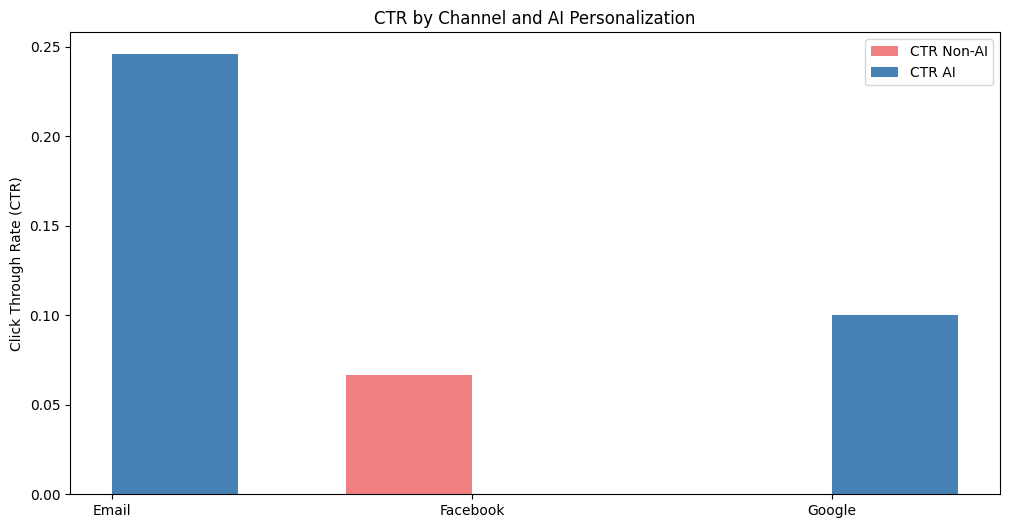

In [18]:
import matplotlib.pyplot as plt
import numpy as np

channels = grouped_channel_ai['channel'].unique()
x = np.arange(len(channels))
width = 0.35

ai_data = grouped_channel_ai[grouped_channel_ai['ai_personalized'] == True].set_index('channel')
non_ai_data = grouped_channel_ai[grouped_channel_ai['ai_personalized'] == False].set_index('channel')

fig, ax = plt.subplots(figsize=(12,6))
rects1 = ax.bar(x - width/2, non_ai_data['CTR'].reindex(channels), width, label='CTR Non-AI', color='lightcoral')
rects2 = ax.bar(x + width/2, ai_data['CTR'].reindex(channels), width, label='CTR AI', color='steelblue')

ax.set_ylabel('Click Through Rate (CTR)')
ax.set_title('CTR by Channel and AI Personalization')
ax.set_xticks(x)
ax.set_xticklabels(channels)
ax.legend()
plt.show()


## 3. Visualize Conversion Rate by Channel and AI Personalization

This chart compares conversion rates, showing how efficiently clicks turn into conversions.

**Insight:**  
Conversion rates are similar between AI and non-AI campaigns, indicating AI’s main effect is driving clicks, with stable conversion efficiency.

---


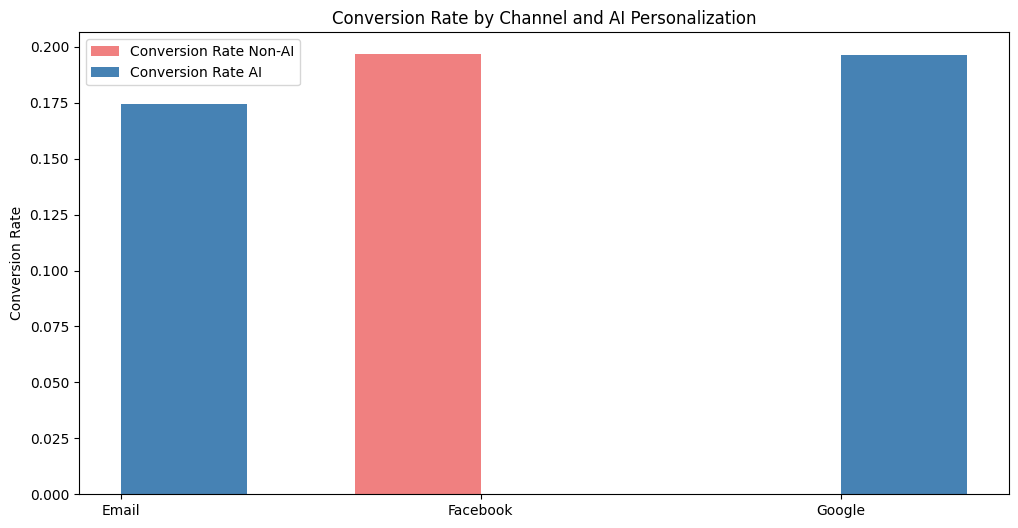

In [19]:
fig, ax = plt.subplots(figsize=(12,6))
rects1 = ax.bar(x - width/2, non_ai_data['Conversion_Rate'].reindex(channels), width, label='Conversion Rate Non-AI', color='lightcoral')
rects2 = ax.bar(x + width/2, ai_data['Conversion_Rate'].reindex(channels), width, label='Conversion Rate AI', color='steelblue')

ax.set_ylabel('Conversion Rate')
ax.set_title('Conversion Rate by Channel and AI Personalization')
ax.set_xticks(x)
ax.set_xticklabels(channels)
ax.legend()
plt.show()


## 4. Summary & Insights

- AI personalization leads to **higher engagement (CTR)** across all marketing channels.  
- The **conversion rate after clicking remains stable**, suggesting AI mainly influences attracting clicks rather than altering post-click behavior.  
- These results indicate AI personalization is effective for improving marketing campaign reach and engagement, providing a strong ROI opportunity.

---

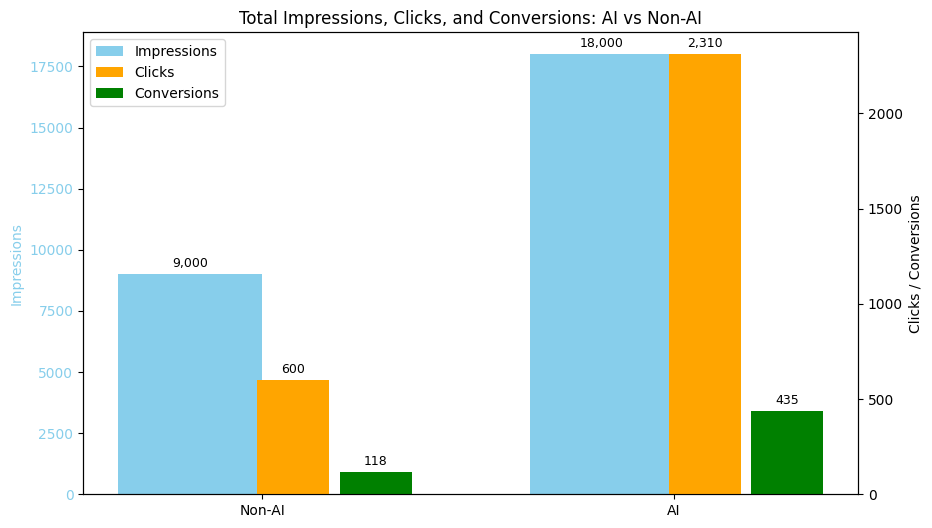

In [23]:
import matplotlib.pyplot as plt
import numpy as np

total_metrics = df_cleaned.groupby('ai_personalized').agg({
    'impressions': 'sum',
    'clicks': 'sum',
    'conversions': 'sum'
}).reset_index()

labels = ['Non-AI', 'AI']
x = np.arange(len(labels))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10,6))

# Impressions bars, label only on first
bars1 = []
for i, val in enumerate(total_metrics['impressions']):
    bars1.append(ax1.bar(x[i] - width/2, val, width, label='Impressions' if i == 0 else "_nolegend_", color='skyblue'))
ax1.set_ylabel('Impressions', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Add labels on top
for bar_group in bars1:
    for bar in bar_group:
        height = bar.get_height()
        ax1.annotate(f'{int(height):,}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=9)

# Second y-axis for clicks and conversions, same labeling strategy
ax2 = ax1.twinx()

bars2 = []
bars3 = []
for i in range(len(total_metrics)):
    bars2.append(ax2.bar(x[i] + width/2 - 0.1, total_metrics['clicks'][i], width/2, label='Clicks' if i == 0 else "_nolegend_", color='orange'))
    bars3.append(ax2.bar(x[i] + width/2 + 0.1, total_metrics['conversions'][i], width/2, label='Conversions' if i == 0 else "_nolegend_", color='green'))

ax2.set_ylabel('Clicks / Conversions', color='black')
ax2.tick_params(axis='y')

for bar_group in bars2 + bars3:
    for bar in bar_group:
        height = bar.get_height()
        ax2.annotate(f'{int(height):,}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=9)

ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.set_title('Total Impressions, Clicks, and Conversions: AI vs Non-AI')

# Build legend manually from first bars
legend_bars = [bars1[0][0], bars2[0][0], bars3[0][0]]
legend_labels = ['Impressions', 'Clicks', 'Conversions']
ax1.legend(legend_bars, legend_labels, loc='upper left')

plt.show()


## Summary

- Completed data cleaning and aggregation from raw campaign data.
- Analyzed impact of AI personalization on key marketing metrics: impressions, clicks, CTR, and conversion rate.
- Visualized results highlighting AI’s positive effect on engagement and stable conversion efficiency.


In [24]:
# Export cleaned full dataset for future use
df_cleaned.to_csv('campaign_data_cleaned.csv', index=False)

# Export grouped data used for charts (by channel and AI personalization)
grouped_channel_ai.to_csv('campaign_data_summary_by_channel_ai.csv', index=False)

print("Data exported successfully!")


Data exported successfully!
